In [1]:
import numpy as np 
import matplotlib.pyplot as plt 
from astropy.io import fits
from IPython.display import display, HTML
import matplotlib.colors as colors
import matplotlib
display(HTML("<style>.container { width:95% !important; }</style>"))

font = {'size'   : 14}

matplotlib.rc('font', **font)

In [2]:
cube = fits.open("/home/milic/data/scratch/sr_inverted.fits")[0].data

In [3]:
cube.shape

(146, 116, 129, 9)

In [4]:
I = cube[:,:,:,7] + cube[:,:,:,8]
I.shape

(146, 116, 129)

In [5]:
Bh = cube[:,:,:,0] * np.sin(cube[:,:,:,1])
Bz = cube[:,:,:,0] * np.cos(cube[:,:,:,1])

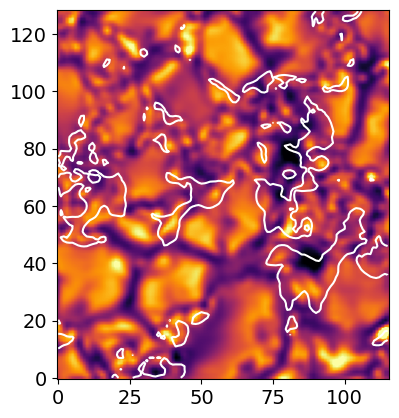

In [6]:
t = 20
plt.imshow(I[t].T, origin='lower', cmap='inferno', vmin=0.7,vmax=1.3)
plt.contour(Bh[t].T, [500],colors='white')

In [7]:
Bx = Bh * np.cos(cube[:,:,:,2])

In [8]:
By = Bh * np.sin(cube[:,:,:,2])

In [9]:
Bxa = Bx[:, ::2, ::2]
Bya = By[:,::2,::2]

In [10]:
x = np.arange(Bxa.shape[1])*2.0
y = np.arange(Bya.shape[2])*2.0

In [11]:
X,Y = np.meshgrid(x,y)

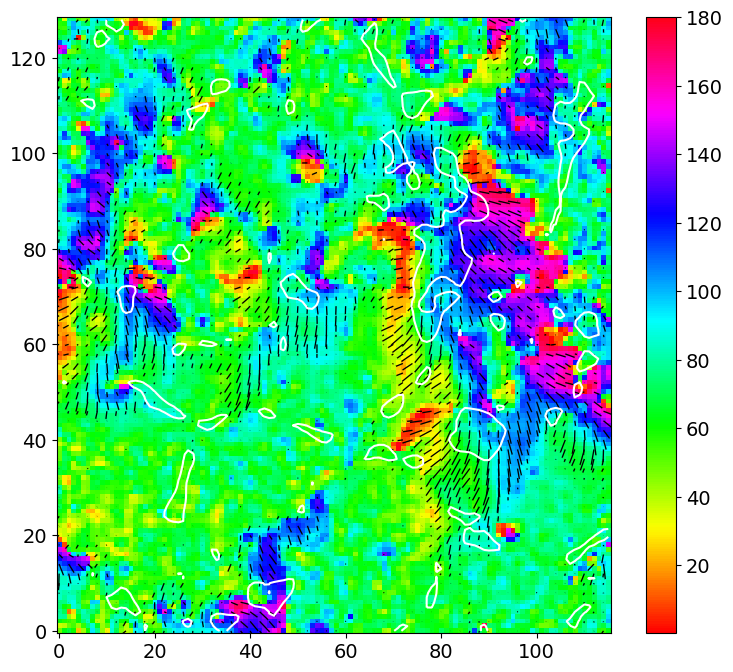

In [12]:
plt.figure(figsize=[9,8])
plt.imshow(np.degrees(cube[t,:,:,2].T), origin='lower', cmap='hsv')
plt.colorbar()
plt.quiver(X, Y, -Bxa[t].T, -Bya[t].T, scale=20000, headwidth=0)
plt.contour(I[t].T, [0.84], colors='white')

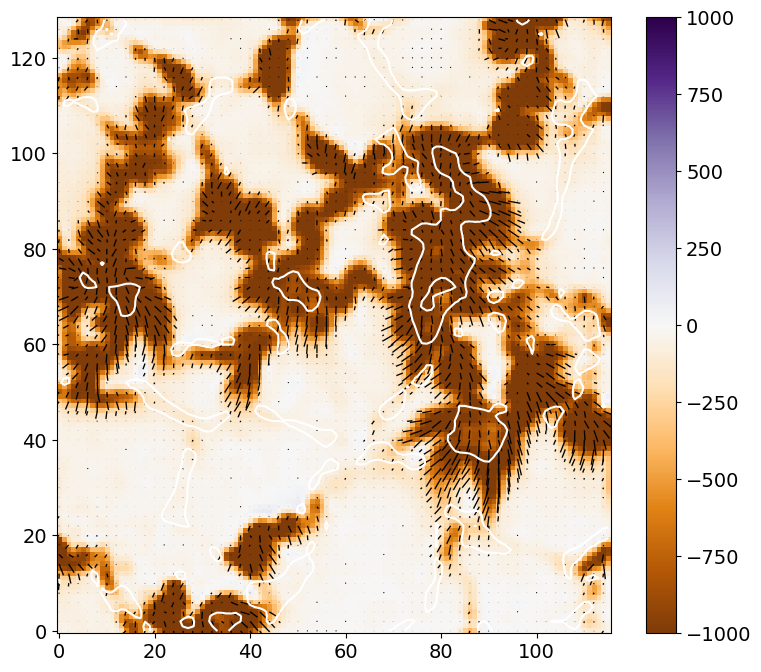

In [13]:
plt.figure(figsize=[9,8])
plt.imshow((Bz[t].T), origin='lower', cmap='PuOr', vmin=-1000, vmax=1000)
plt.colorbar()
plt.quiver(X, Y, -Bxa[t].T, -Bya[t].T, scale=20000, headwidth=0)
plt.contour(I[t].T, [0.86], colors='white')

In [14]:
#![image.png](attachment:5c764323-7a8f-494a-9e24-a4d19111d074.png)

In [15]:
Bxar = Bxa * np.cos(np.radians(15)) - Bya * np.sin(np.radians(15))
Byar = Bya * np.cos(np.radians(15)) + Bxa * np.sin(np.radians(15))

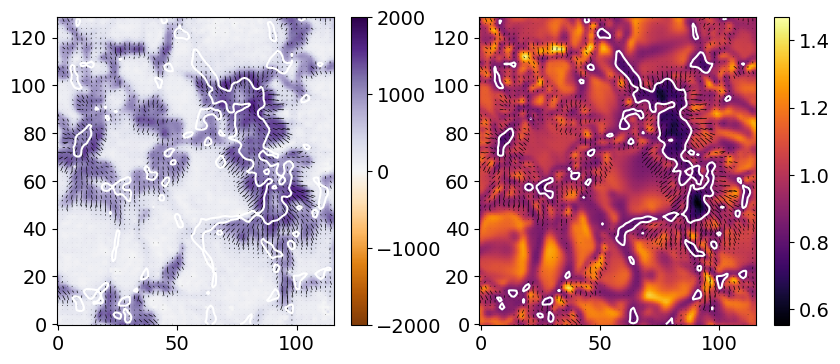

In [16]:
t = 90
plt.figure(figsize=[10,4])
plt.subplot(121)
#plt.imshow((Bz[t].T), origin='lower', cmap='PuOr', vmin=-1500, vmax=1500)
plt.imshow((cube[t,:,:,0].T), origin='lower', cmap='PuOr', vmin=-2000, vmax=2000)
plt.colorbar()
plt.quiver(X, Y, -Bxar[t].T, -Byar[t].T, scale=20000, headwidth=0)
plt.contour(I[t].T, [0.86], colors='white')
plt.subplot(122)
plt.imshow((I[t].T), origin='lower', cmap='inferno')
plt.colorbar()
plt.quiver(X, Y, -Bxar[t].T, -Byar[t].T, scale=20000, headwidth=0)
plt.contour(I[t].T, [0.84], colors='white')
plt.savefig("bh_lines.png", bbox_inches='tight')

In [39]:
NX = cube.shape[1]
NY = cube.shape[2]
x = np.arange(NX) * 48.0 # km
y = np.arange(NY) * 48.0 # km
print (NX, NY)

xa = np.arange(NX) * 0.065
ya = np.arange(NY) * 0.065

116 129


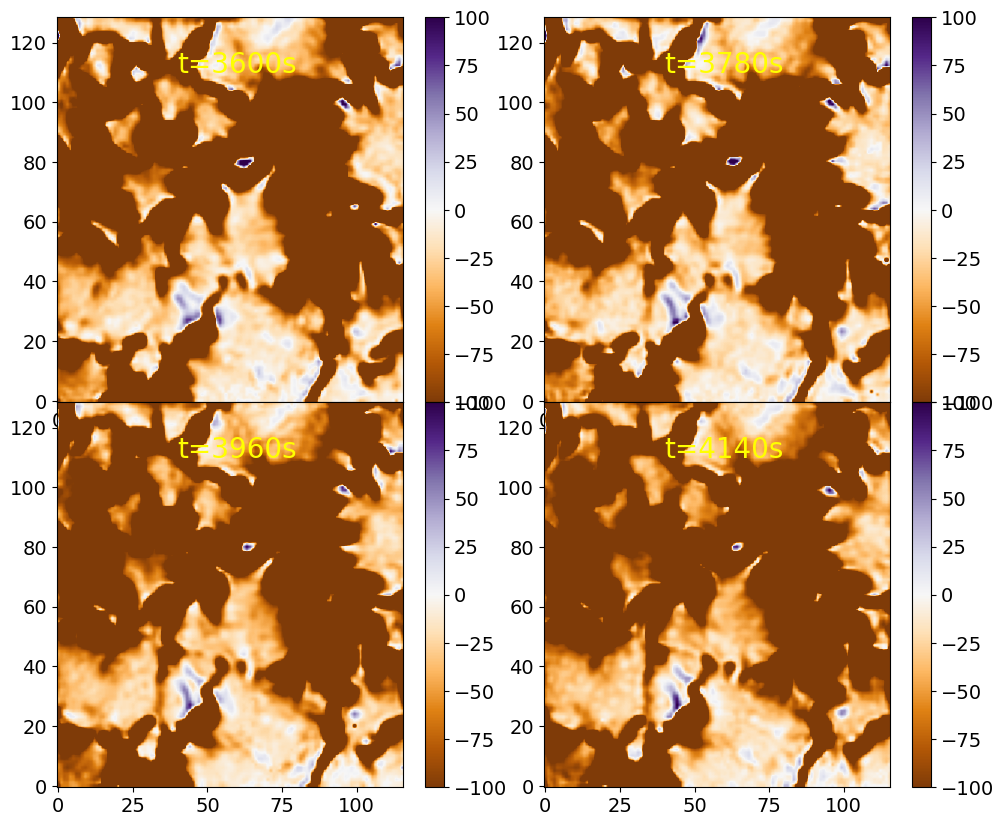

In [18]:
# Shitty version:
t=60

plt.figure(figsize=[12,10])
for i in range(0,1):
    for j in range(0,4):
        
        plt.subplot(2,2,i*1+j+1)
        plt.imshow((Bz[t].T), origin='lower', cmap='PuOr', vmin=-100, vmax=100)
        plt.text(40,110,"t="+str(t*60)+"s", color='yellow', fontsize=20)
        plt.colorbar()
        #plt.contour(cube[t,:,:,3].T, [0], colors = 'pink')

        t+=3

plt.subplots_adjust(wspace=0.1, hspace=0)
        
plt.savefig("milne_eddington_blos_ev.png", bbox_inches='tight')

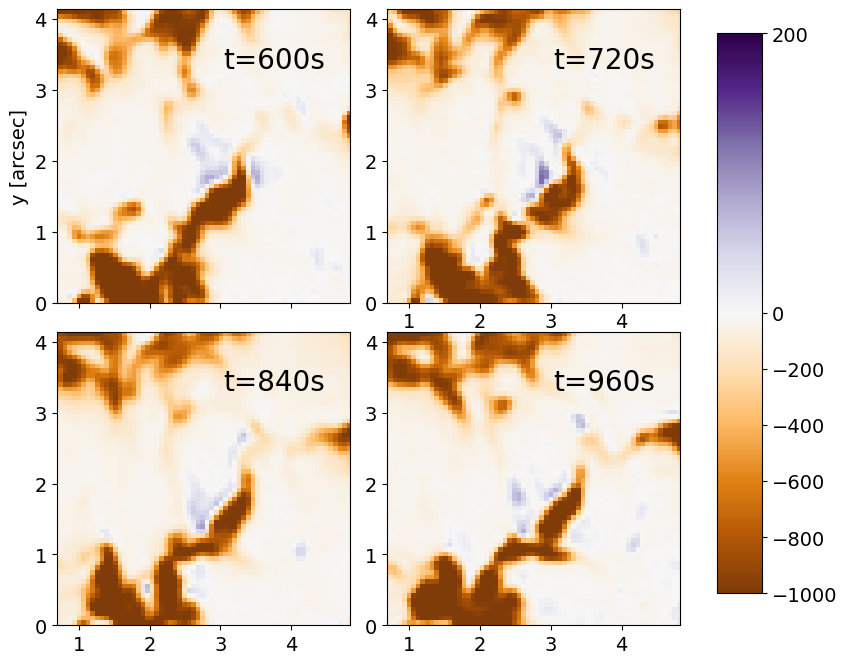

In [53]:
t = 60
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=[9,8])


divnorm = colors.TwoSlopeNorm(vmin=-1000, vcenter=0, vmax=200)

#subplots_adjust(left=None, bottom=None, right=None, top=None, wspace=None, hspace=None)
fig.subplots_adjust(wspace=-0.1, hspace=0.1)
for ax in axes.flat:
    im = ax.imshow((Bz[t].T), origin='lower', cmap='PuOr', norm=divnorm, extent=[xa[0],xa[-1],ya[0],ya[-1]], aspect='equal')
    ax.text(2200/725.0,2400/725.0,"t="+str(t*10)+"s", color='black', fontsize=20)
    ax.set_xlim([500/725.0,3500/725.0])
    ax.set_ylim([0/725.0,3000/725.0])
    
    if (t==60):
        ax.set_xticklabels([])
        ax.set_ylabel("y [arcsec]")
    
    if (t==63):
        ax.set_yticklabels([])
        ax.set_xticklabels([])
        
    if (t==66):
        ax.set_xlabel("x [arcsec]")
        ax.set_ylabel("y [arcsec]")
    if (t==69):
        ax.set_yticklabels([])
        ax.set_xlabel("x [arcsec]")
    
    t += 12

fig.subplots_adjust(right=0.9)
cbar_ax = fig.add_axes([0.9, 0.15, 0.05, 0.7])
fig.colorbar(im, cax=cbar_ax)
plt.savefig("zoom_in_evolution_2min.eps",bbox_inches='tight')
plt.savefig("zoom_in_evolution_2min.png",bbox_inches='tight')

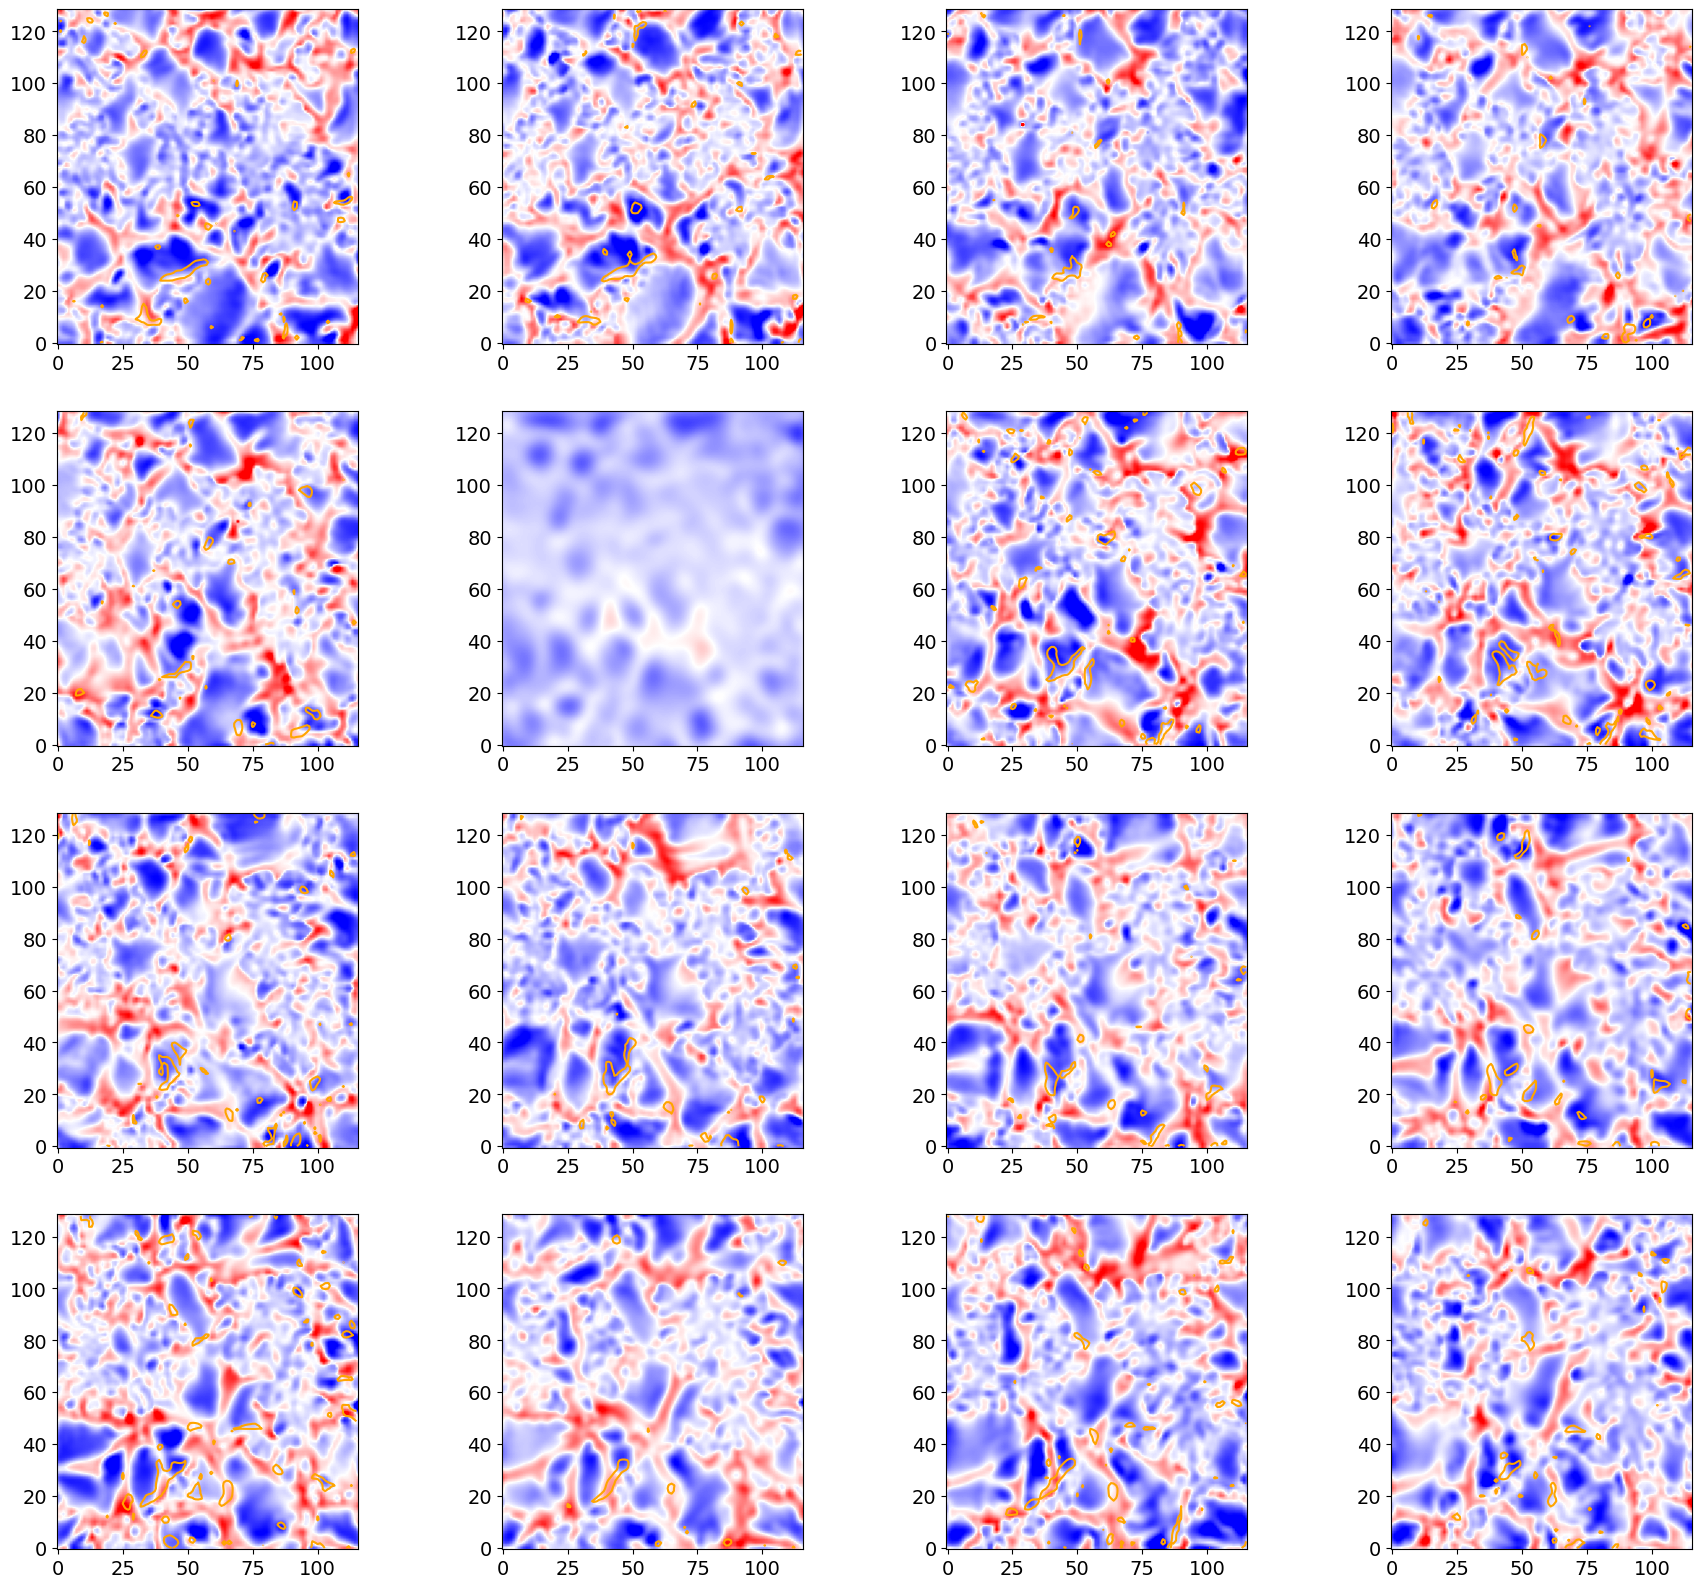

In [20]:
t=0
plt.figure(figsize=[22,20])
for i in range(0,4):
    for j in range(0,4):
        
        plt.subplot(4,4,i*4+j+1)
        plt.imshow((cube[t,:,:,3].T), origin='lower', cmap='bwr', vmin=-2, vmax=2)
        #plt.contour(cube[t,:,:,3].T, [0], colors = 'pink')
        plt.contour(Bz[t,:,:].T, [10], colors = 'orange')
        t += 9

In [21]:
t = np.linspace(148
plt.plot(cube[:,47,22,3])
#plt.plot(cube[:,47,22,0]/2000)

SyntaxError: invalid syntax (1142752335.py, line 2)

In [ ]:
t = 60
plt.figure(figsize=[10.1,9.2])
plt.subplot(221)
plt.imshow((Bz[t].T/1E3), origin='lower', cmap='PuOr', vmin=-2, vmax=2)
plt.title("Vertical field [kG]")
#plt.imshow((cube[t,:,:,0].T), origin='lower', cmap='PuOr', vmin=-2000, vmax=2000)
plt.colorbar()
plt.quiver(X, Y, -Bxar[t].T, -Byar[t].T, scale=15000, headwidth=0)
plt.ylabel("y [Mm]")

#plt.contour(I[t].T, [0.92], colors='white')
plt.subplot(222)
plt.title("Horizontal field [kG]")
plt.imshow((Bh[t].T/1E3), origin='lower', cmap='cividis', vmin=0, vmax=1)
#plt.imshow((cube[t,:,:,0].T), origin='lower', cmap='PuOr', vmin=-2000, vmax=2000)
plt.colorbar()
plt.quiver(X, Y, -Bxar[t].T, -Byar[t].T, scale=15000, headwidth=0)
#plt.xlabel("x [Mm]")
#plt.contour(I[t].T, [0.92], colors='white')

plt.subplot(223)
plt.imshow(cube[t,:,:,3].T, origin='lower', cmap='bwr', vmin=-3,vmax=3)
plt.title("LOS velocity [km/s]")
plt.xlabel("x [Mm]")
plt.xlabel("y [Mm]")
plt.colorbar()

plt.subplot(224)
plt.imshow(cube[t,:,:,4].T/6300 * 3E5, origin='lower', cmap='viridis', vmin=0,vmax=5)
plt.title("Line width [km/s]")
plt.xlabel("x [Mm]")
plt.colorbar()

#plt.quiver(X, Y, -Bxar[t].T, -Byar[t].T, scale=10000, headwidth=0)
#plt.contour(I[t].T, [0.92], colors='white')
#plt.subplot(133)
#plt.imshow(I[t].T, origin='lower', cmap='inferno', vmin=0.6,vmax=1.4)
#plt.colorbar()
#plt.quiver(X, Y, -Bxar[t].T, -Byar[t].T, scale=10000, headwidth=0)
#plt.contour(I[t].T, [0.92], colors='white')

plt.savefig("overview.png", bbox_inches='tight')

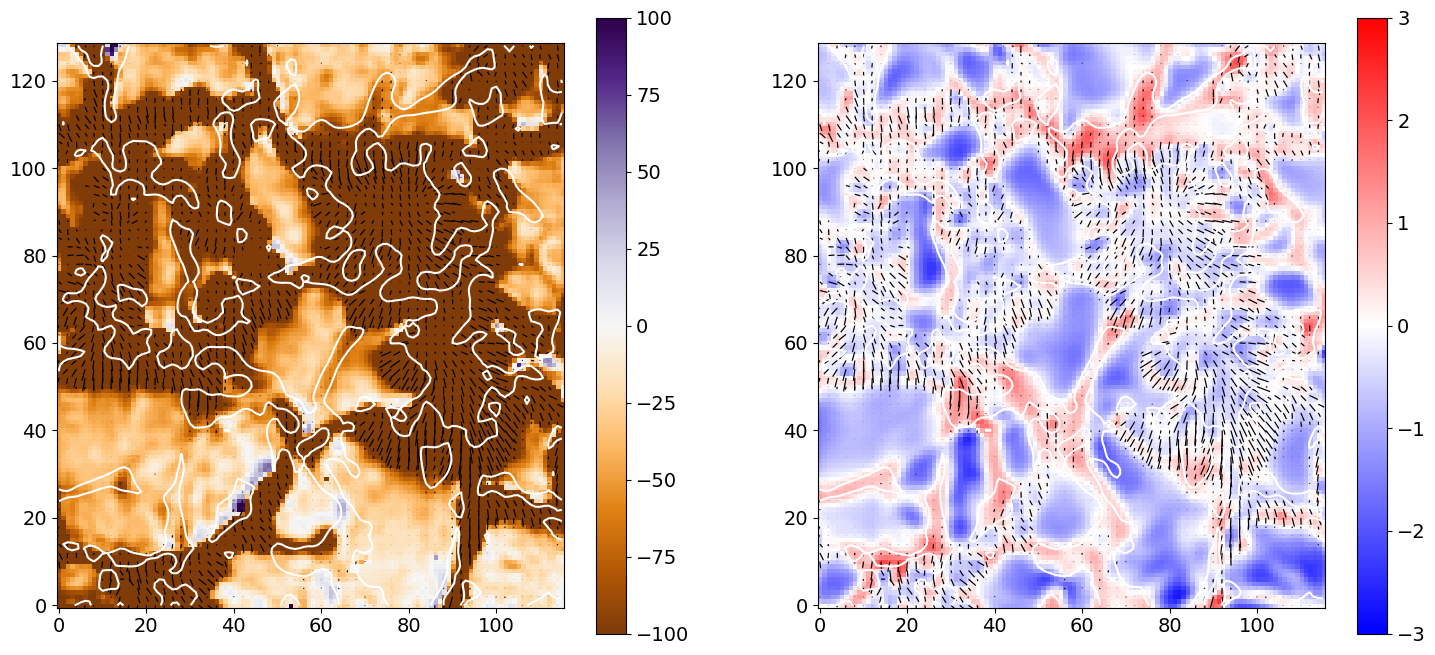

In [22]:
t = 123
plt.figure(figsize=[18,8])
plt.subplot(121)
plt.imshow((Bz[t].T), origin='lower', cmap='PuOr', vmin=-100, vmax=100)
#plt.imshow((cube[t,:,:,0].T), origin='lower', cmap='PuOr', vmin=-2000, vmax=2000)
plt.colorbar()
plt.quiver(X, Y, -Bxar[t].T, -Byar[t].T, scale=20000, headwidth=0)
plt.contour(I[t].T, [0.92], colors='white')
plt.subplot(122)
plt.imshow(cube[t,:,:,3].T, origin='lower', cmap='bwr', vmin=-3,vmax=3)
plt.colorbar()
plt.quiver(X, Y, -Bxar[t].T, -Byar[t].T, scale=20000, headwidth=0)
plt.contour(I[t].T, [0.92], colors='white')
plt.savefig("bh_lines.png", bbox_inches='tight')

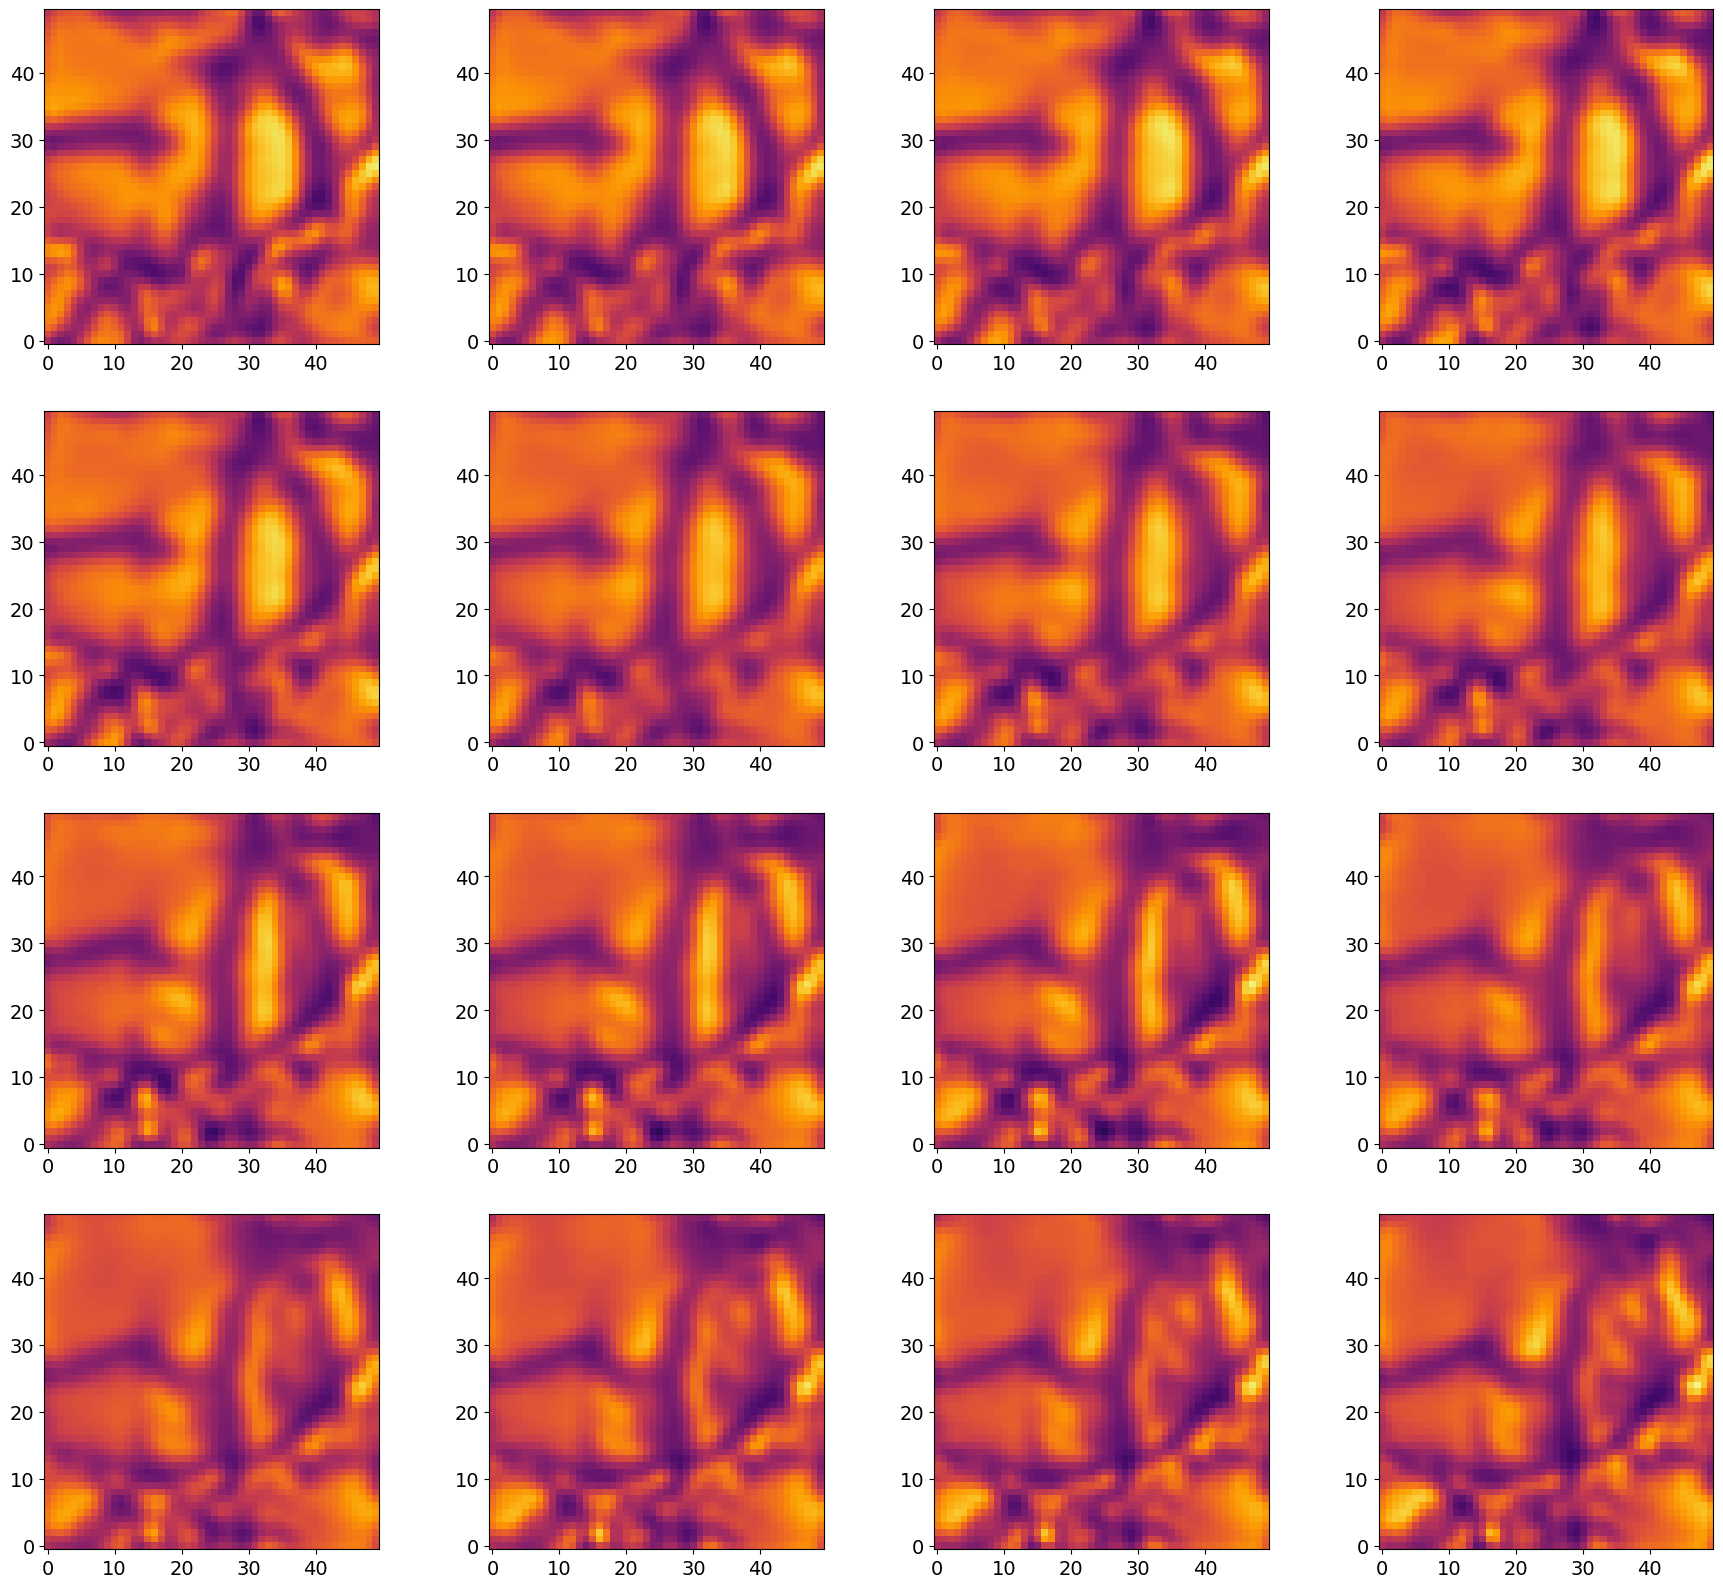

In [23]:
t=110
plt.figure(figsize=[22,20])
for i in range(0,4):
    for j in range(0,4):
        
        plt.subplot(4,4,i*4+j+1)
        plt.imshow(I[t,:50,:50].T, origin='lower', cmap='inferno', vmin=0.6,vmax=1.4)
        #plt.imshow((cube[t,:,:,3].T), origin='lower', cmap='bwr', vmin=-2, vmax=2)
        #plt.contour(cube[t,:,:,3].T, [0], colors = 'pink')
        #plt.contour(Bz[t,:,:].T, [10], colors = 'orange')
        t += 1

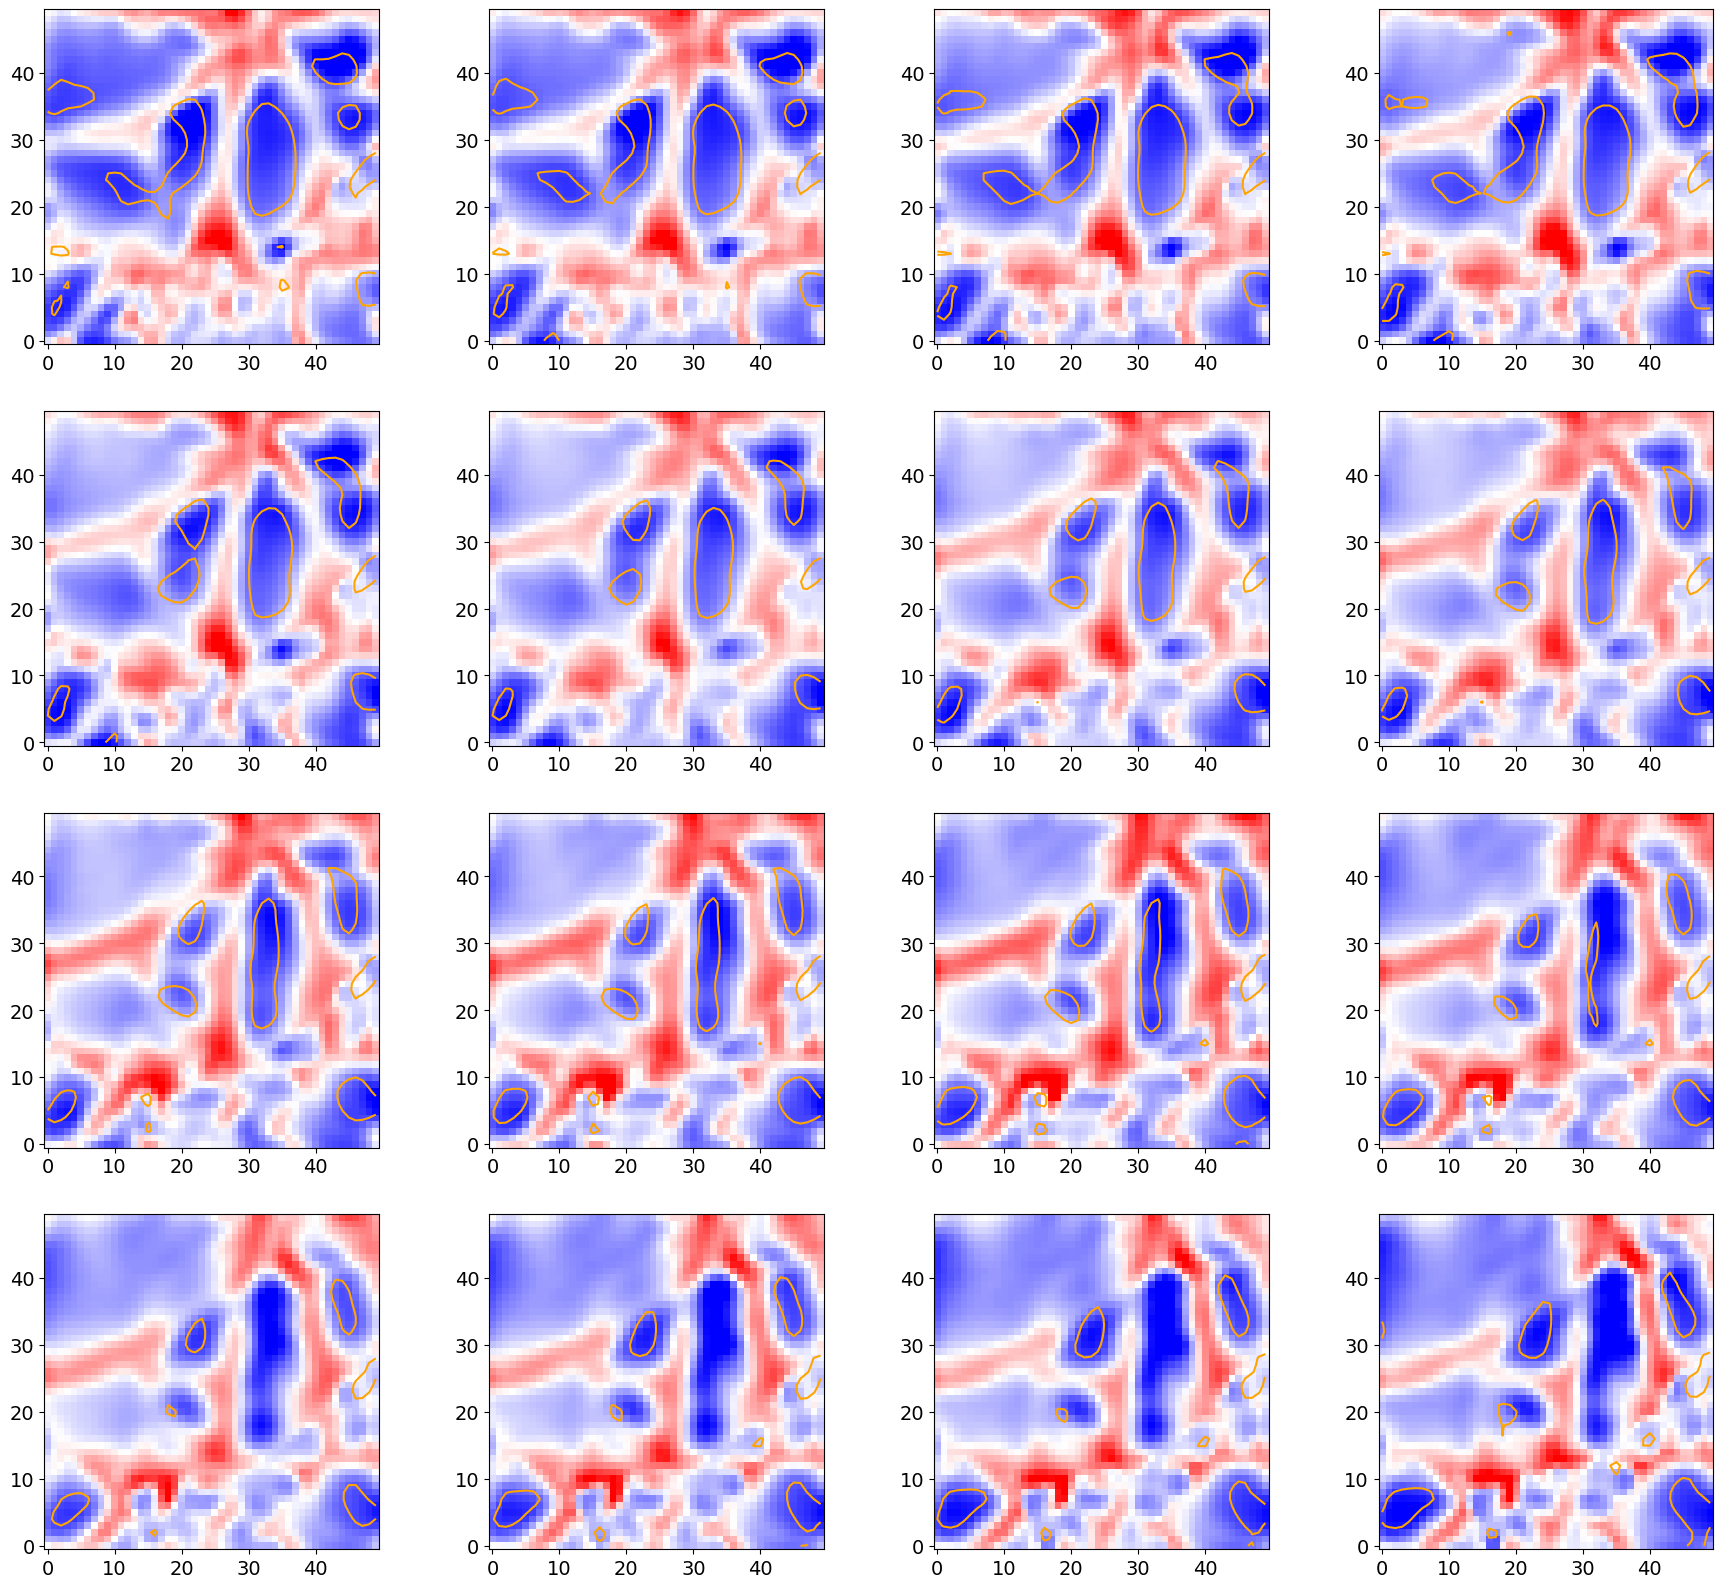

In [24]:
t=110
plt.figure(figsize=[22,20])
for i in range(0,4):
    for j in range(0,4):
        
        plt.subplot(4,4,i*4+j+1)
        plt.imshow((cube[t,:50,:50,3].T), origin='lower', cmap='bwr', vmin=-2, vmax=2)
        #plt.contour(cube[t,:,:,3].T, [0], colors = 'pink')
        #plt.contour(Bz[t,:50,:50].T, [10], colors = 'orange')
        plt.contour(I[t,:50,:50].T, [1.2], colors='orange')
        t += 1

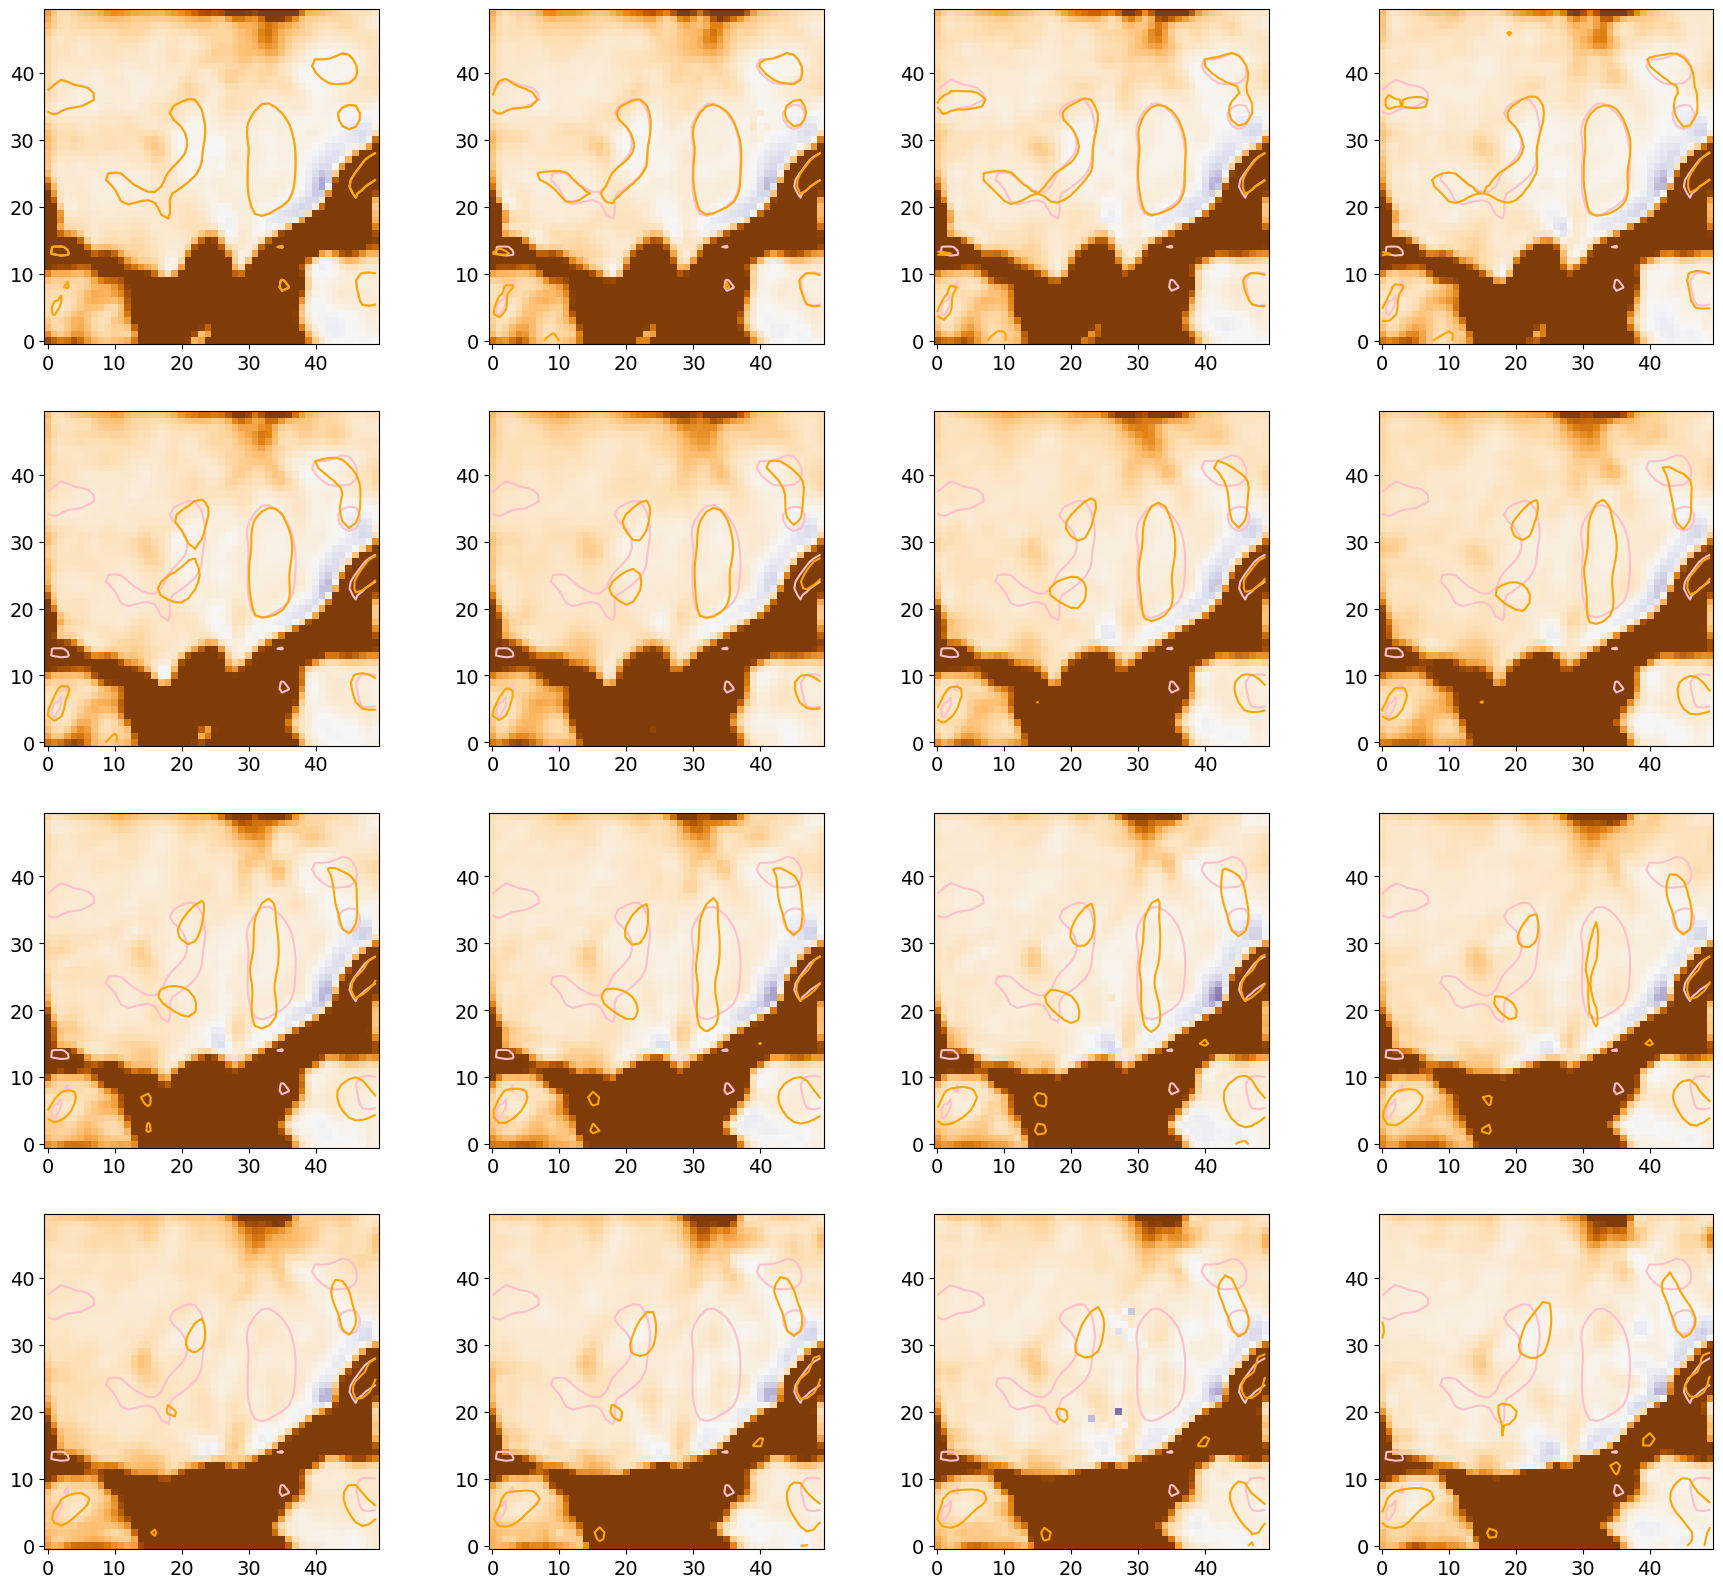

In [25]:
t0=110
t = t0
plt.figure(figsize=[22,20])
for i in range(0,4):
    for j in range(0,4):
        
        plt.subplot(4,4,i*4+j+1)
        plt.imshow((Bz[t,:50,:50].T), origin='lower', cmap='PuOr', vmin=-300, vmax=300)
        #plt.contour(cube[t,:,:,3].T, [0], colors = 'pink')
        #plt.contour(Bz[t,:50,:50].T, [10], colors = 'orange')
        plt.contour(I[t0,:50,:50].T, [1.2], colors='pink')
        plt.contour(I[t,:50,:50].T, [1.2], colors='orange')
        t += 1

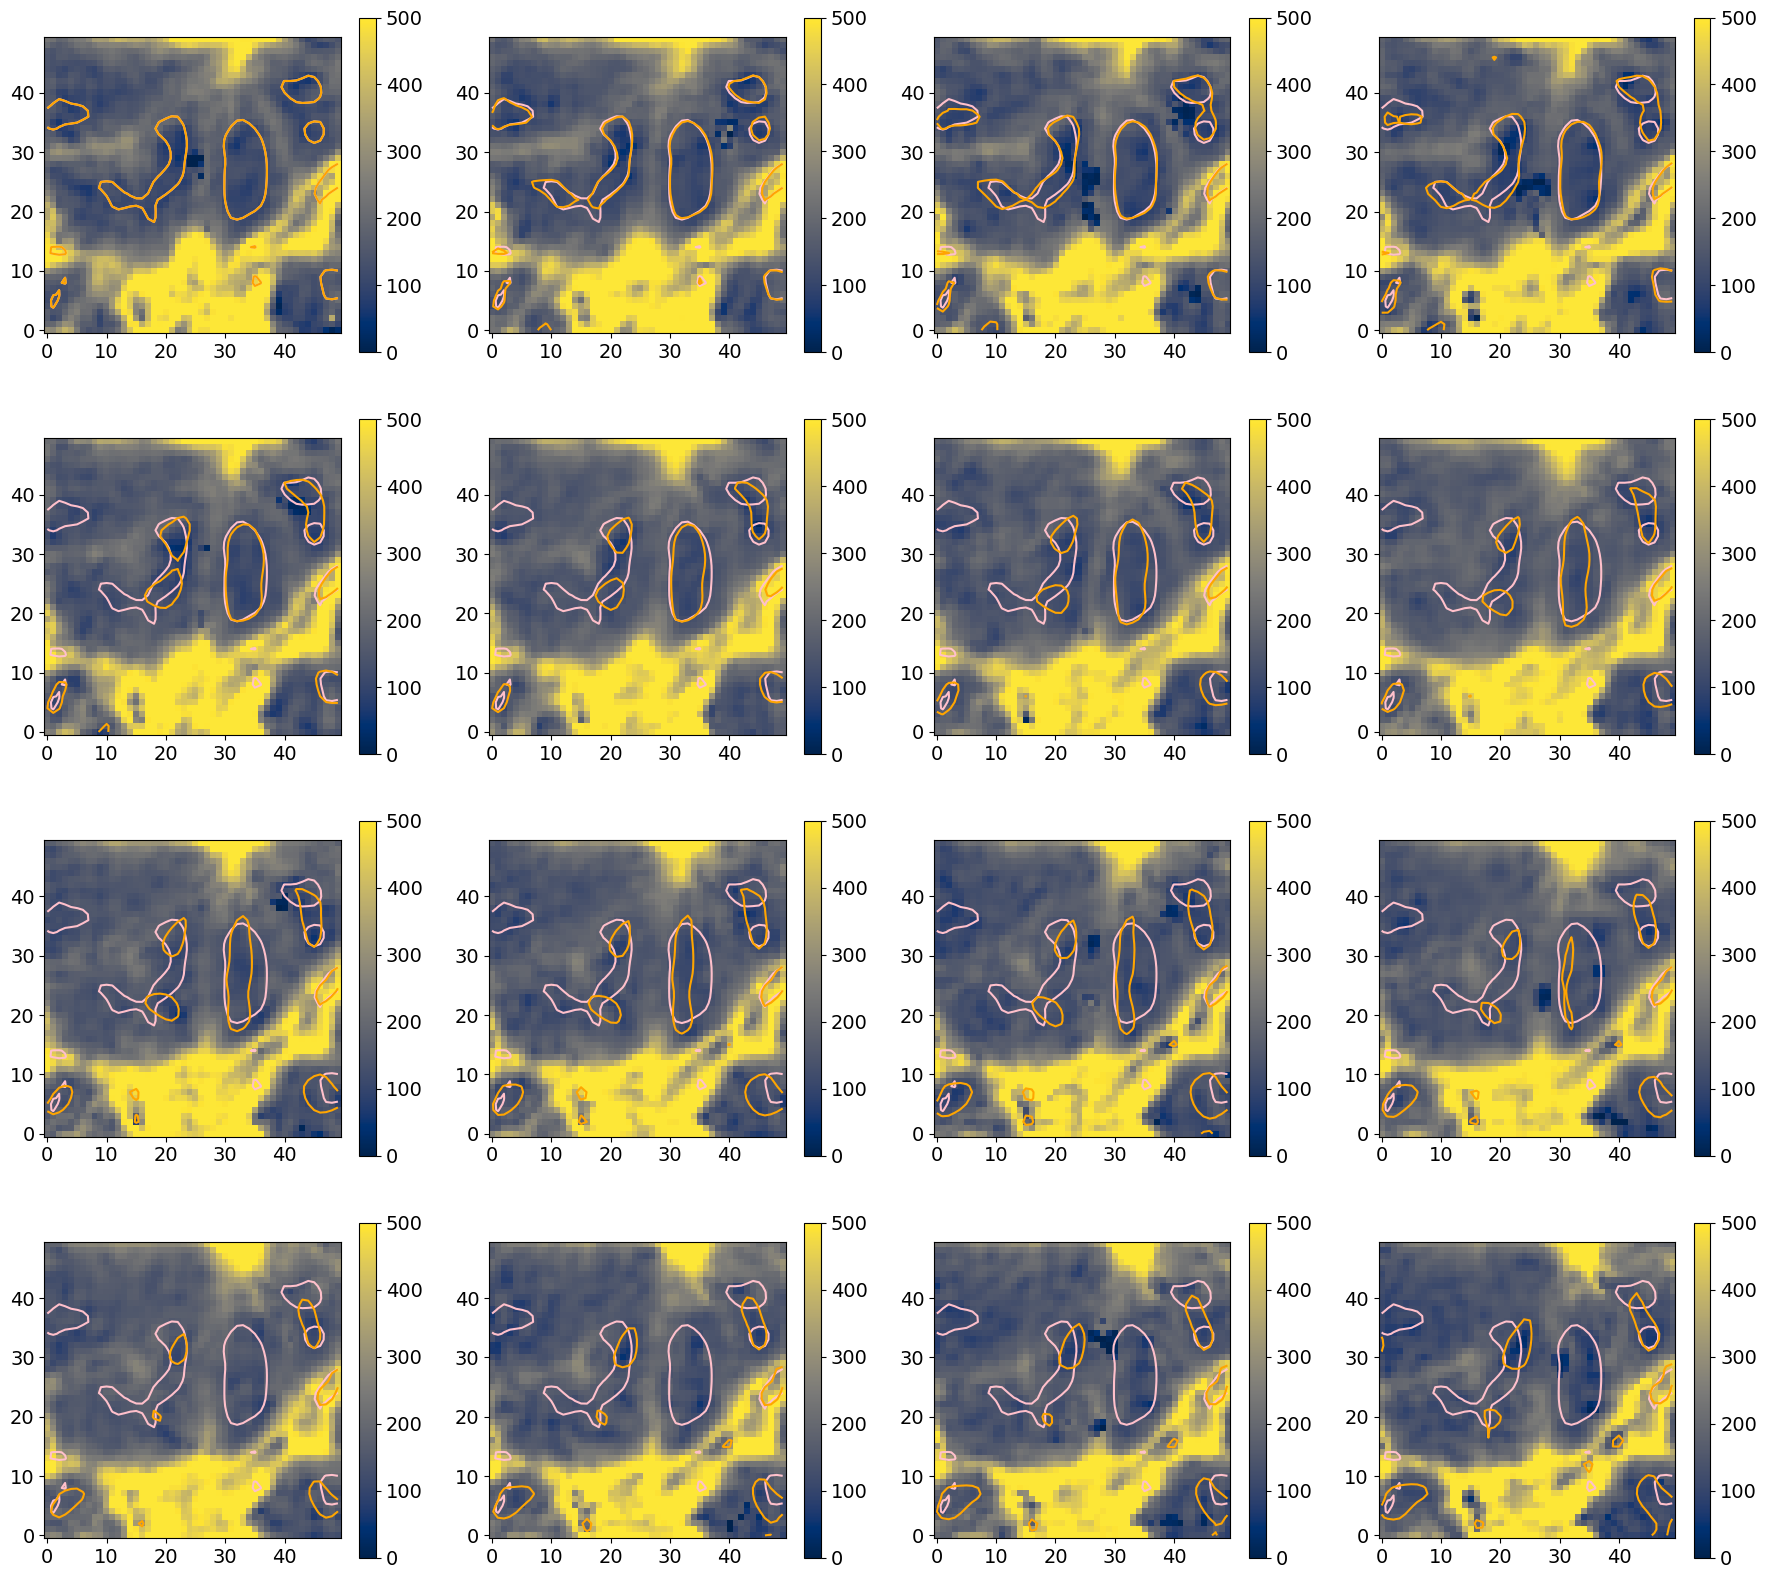

In [26]:
t0=110
t = t0
plt.figure(figsize=[22,20])
for i in range(0,4):
    for j in range(0,4):
        
        plt.subplot(4,4,i*4+j+1)
        plt.imshow((Bh[t,:50,:50].T), origin='lower', cmap='cividis', vmin=0, vmax=500)
        plt.colorbar()
        #plt.contour(cube[t,:,:,3].T, [0], colors = 'pink')
        #plt.contour(Bz[t,:50,:50].T, [10], colors = 'orange')
        plt.contour(I[t0,:50,:50].T, [1.2], colors='pink')
        plt.contour(I[t,:50,:50].T, [1.2], colors='orange')
        t += 1

# STOKES PLOTS

In [49]:
t = 60
number = 102000 + 60 * 6000
path = '/home/milic/data/MiHi/6301_plage/obs04/mihi_sp/lr0250/'
stokes = fits.open(path+"img_fit."+str(number)+".."+str(number+5999)+".00.00.lr0250.cube.fits")[0].data

In [50]:
fits.open(path+"img_fit."+str(number)+".."+str(number+5999)+".00.00.lr0250.cube.fits")[0].header

SIMPLE  =                    T / file does conform to FITS standard             
BITPIX  =                  -32 / number of bits per data pixel                  
NAXIS   =                    4 / number of data axes                            
NAXIS1  =                  588 / length of data axis 1                          
NAXIS2  =                    4 / length of data axis 2                          
NAXIS3  =                  160 / length of data axis 3                          
NAXIS4  =                  147 / length of data axis 4                          
EXTEND  =                    T / FITS dataset may contain extensions            
COMMENT   FITS (Flexible Image Transport System) format is defined in 'Astronomy
COMMENT   and Astrophysics', volume 376, page 359; bibcode: 2001A&A...376..359H 
DATE    = '2024-03-14'         / Creation UTC (CCCC-MM-DD) date of FITS header  
NSR     =                    1 /                                                
WLI1    =                   

In [51]:
fits.open(path+"img_fit."+str(number)+".."+str(number+5999)+".00.00.lr0250.cube.fits")[1].data

array([6299.06      , 6299.07001704, 6299.08003407, 6299.09005111,
       6299.10006814, 6299.11008518, 6299.12010221, 6299.13011925,
       6299.14013629, 6299.15015332, 6299.16017036, 6299.17018739,
       6299.18020443, 6299.19022147, 6299.2002385 , 6299.21025554,
       6299.22027257, 6299.23028961, 6299.24030664, 6299.25032368,
       6299.26034072, 6299.27035775, 6299.28037479, 6299.29039182,
       6299.30040886, 6299.31042589, 6299.32044293, 6299.33045997,
       6299.340477  , 6299.35049404, 6299.36051107, 6299.37052811,
       6299.38054514, 6299.39056218, 6299.40057922, 6299.41059625,
       6299.42061329, 6299.43063032, 6299.44064736, 6299.4506644 ,
       6299.46068143, 6299.47069847, 6299.4807155 , 6299.49073254,
       6299.50074957, 6299.51076661, 6299.52078365, 6299.53080068,
       6299.54081772, 6299.55083475, 6299.56085179, 6299.57086882,
       6299.58088586, 6299.5909029 , 6299.60091993, 6299.61093697,
       6299.620954  , 6299.63097104, 6299.64098807, 6299.65100

In [28]:
stokes.shape

(147, 160, 4, 588)

In [29]:
stokes = stokes[16:-15,16:-15,:,200:400]
stokes.shape

(116, 129, 4, 200)

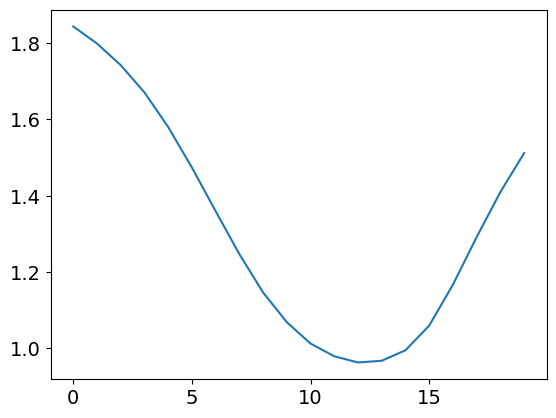

In [30]:
plt.plot(np.mean(stokes[:,:,0,130:150], axis=(0,1)))

In [31]:
Iqs = np.mean(stokes[:,:,0,100:125])

In [32]:
stokes /= Iqs

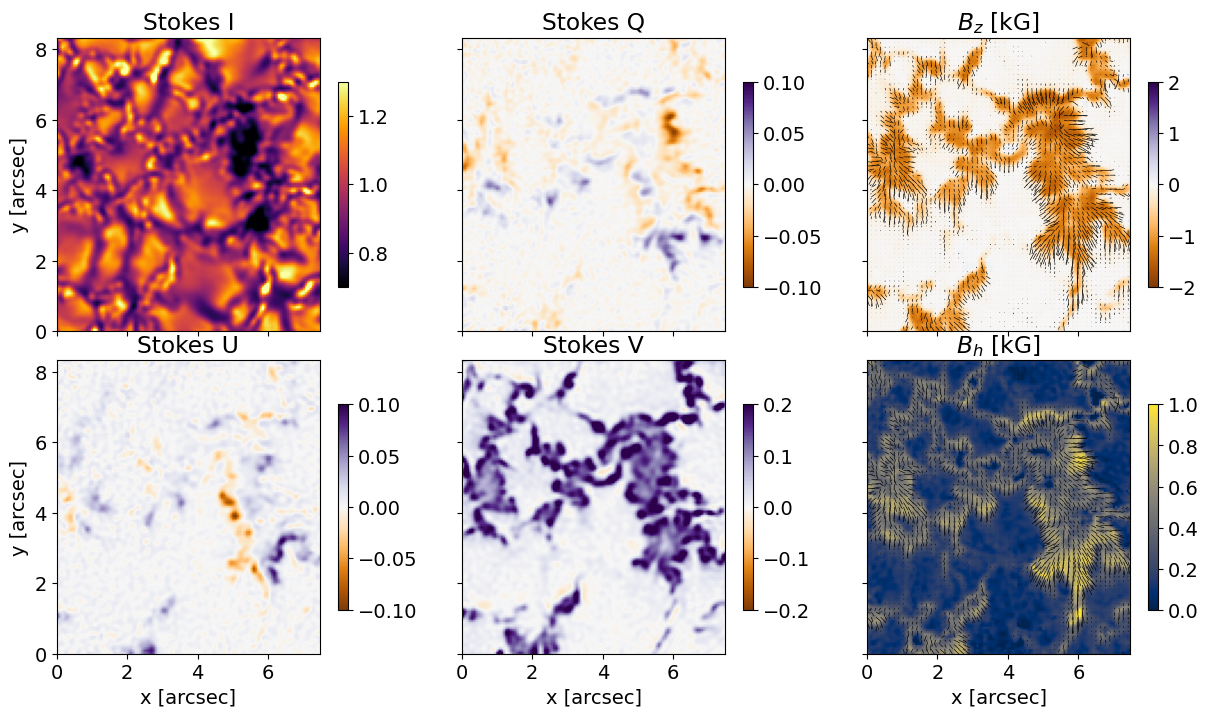

In [45]:
fig, axes = plt.subplots(nrows=2, ncols=3, figsize=[15,8])


#divnorm = colors.TwoSlopeNorm(vmin=-1000, vcenter=0, vmax=200)

#subplots_adjust(left=None, bottom=None, right=None, top=None, wspace=None, hspace=None)
fig.subplots_adjust(wspace=0.15, hspace=0.1)
plot_no = 0

for ax in axes.flat:
    
    if (plot_no==0):
        im = ax.imshow(np.mean(stokes[:,:,0,100:125],axis=2).T, origin='lower', cmap='inferno', vmin=0.7,vmax=1.3, extent=[xa[0],xa[-1],ya[0],ya[-1]], aspect='equal')
        #ax.text(2200,2400,"t="+str(t*10)+"s", color='black', fontsize=20)
        #ax.set_xlim([500,3500])
        #ax.set_ylim([0,3000])
        ax.set_xticklabels([])
        ax.set_ylabel("y [arcsec]")
        ax.set_title("Stokes I")
        fig.colorbar(im, shrink=0.7)
    
    if (plot_no==1):
        im = ax.imshow(np.mean(stokes[:,:,plot_no,140:145],axis=2).T, origin='lower', cmap='PuOr', vmin=-0.1,vmax=0.1, extent=[xa[0],xa[-1],ya[0],ya[-1]], aspect='equal')
        ax.set_yticklabels([])
        ax.set_xticklabels([])
        ax.set_title("Stokes Q")
        fig.colorbar(im, shrink=0.7)
    
    if (plot_no==3):
        im = ax.imshow(np.mean(stokes[:,:,plot_no-1,140:145],axis=2).T, origin='lower', cmap='PuOr', vmin=-0.1,vmax=0.1, extent=[xa[0],xa[-1],ya[0],ya[-1]], aspect='equal')
        #ax.set_yticklabels([])
        #ax.set_xticklabels([])
        ax.set_title("Stokes U")
        fig.colorbar(im, shrink=0.7)
        ax.set_xlabel("x [arcsec]")
        ax.set_ylabel("y [arcsec]")
    
    
    if (plot_no==4):
        im = ax.imshow(np.mean(stokes[:,:,plot_no-1,147:152],axis=2).T, origin='lower', cmap='PuOr', vmin=-0.2,vmax=0.2, extent=[xa[0],xa[-1],ya[0],ya[-1]], aspect='equal')
        ax.set_yticklabels([])
        #ax.set_xticklabels([])
        ax.set_xlabel("x [arcsec]")
        ax.set_title("Stokes V")
        #ax.set_ylabel("y [km]")
        fig.colorbar(im, shrink=0.7)
        
    t = 60
    if (plot_no ==2):
        im = ax.imshow((Bz[t].T/1E3), origin='lower', cmap='PuOr', vmin=-2, vmax=2, extent=[xa[0],xa[-1],ya[0],ya[-1]], aspect='equal')
        ax.set_title("$B_{z}$ [kG]")
        fig.colorbar(im, shrink=0.7)
        ax.quiver(xa[::2], ya[::2], -Bxar[t].T, -Byar[t].T, scale=15000, headwidth=0)
        #ax.set_xlabel("x [km]")
        ax.set_yticklabels([])
        ax.set_xticklabels([])
        
    if (plot_no ==5):
        im = ax.imshow((Bh[t].T/1E3), origin='lower', cmap='cividis', vmin=0, vmax=1, extent=[xa[0],xa[-1],ya[0],ya[-1]], aspect='equal')
        ax.set_title("$B_{h}$ [kG]")
        #plt.title("Vertical field [kG]")
        fig.colorbar(im, shrink=0.7)
        ax.quiver(xa[::2], ya[::2], -Bxar[t].T, -Byar[t].T, scale=15000, headwidth=0)
        ax.set_xlabel("x [arcsec]")
        ax.set_yticklabels([])
        
        
    plot_no+=1
    
#fig.subplots_adjust(right=0.9)
#cbar_ax = fig.add_axes([0.9, 0.15, 0.05, 0.7])
#fig.colorbar(im, cax=cbar_ax)
plt.savefig("obs_me_field.eps",bbox_inches='tight')
plt.savefig("obs_me_field.png",bbox_inches='tight')